# Titanic Dataset

the goal of working with this dataset is to build a predictive model that answers the question " what sorts of people were more likely to survive " 

But, we will limit it into our scope which is figuring out the relation between survival rate and dataset features

## Data Dictionary
Variable --> Definition  -->         Key


survival --> Survival -->          	0 = No, 1 = Yes

pclass	-->  Ticket class -->       1 = 1st, 2 = 2nd, 3 = 3rd

sex	   -->   Sex	

Age	 -->     Age in years	


sibsp	-->  # of siblings / spouses aboard the Titanic	


parch	 --> # of parents / children aboard the Titanic	


ticket	 --> Ticket number	


fare  -->    Passenger fare	


cabin	-->  Cabin number	


embarked --> Port of Embarkation -->   C = Cherbourg, Q = Queenstown, S = Southampton


## First look (Data Exploration)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
titanic=pd.read_csv('train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the first look we can see that we have the following :

1- 5 integer types features (passenger id, survived , Pclass,SibSp,Parch)

2- 5 String types features (Name,Sex,Ticket,Cabin,Embarked)

3- 2 float types features (Age,Fare)

from the first look we can see that these features has the correct data types and don't need to be changed 

In [8]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


-> Most passengers have traveled alone

-> Since the mean is close to the STD therefore, there are few outliers on fare feature

-> Most of the passengers are below 38 years


In [13]:
titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


From the above analysis we can conclude that 

1- more than 50% of the passengers were males

2- Most of the passengers Embarked on Southampton



## Data Cleaning

In our analysis i will drop the following features as they have many missing values

1- Cabin 

2- Ticket


In [14]:
titanic.drop(columns=['Cabin'],inplace=True)
titanic.drop(columns=['Ticket'],inplace=True)

In [15]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


I will replace the missing values with the most occuraning value 

--> they are only 2 missing values

In [31]:
titanic.Embarked=titanic.Embarked.fillna(titanic.Embarked.dropna().max())

In [56]:
cats=['female','male']
maping={'female':1,'male':0}
titanic['Sex']=pd.Categorical(titanic['Sex'],categories=cats,ordered=True)
titanic['SexCor']=titanic['Sex'].map(maping).astype(int)

--> here something should be done with the missing ages !! 

In [57]:
titanic.corr()['Survived'].sort_values(ascending=False)

Survived       1.000000
SexCor         0.543351
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

From this correlation we can conclude that :

1- Sex and Age has positive correlation with the target 
2- Pclass has a strong negative correlation with the target 

<AxesSubplot:>

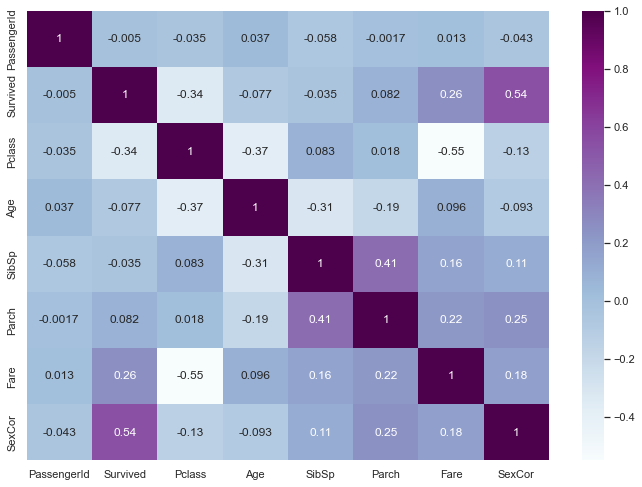

In [67]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(titanic.corr(),annot=True,cmap='BuPu')

## Data analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

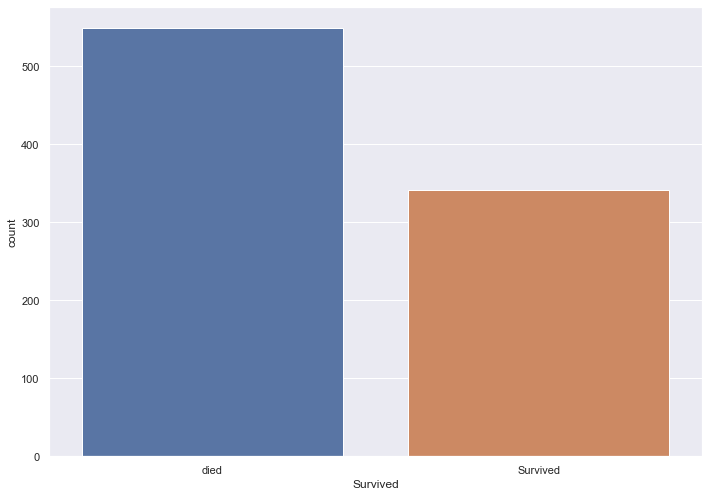

In [69]:
sns.countplot(x=titanic['Survived'].replace({0:'died',1:'Survived'}))

In [76]:
def survived_group(feature):
    return titanic[[feature,'Survived']].groupby([feature]).mean().sort_values(by='Survived')

def survived_bar(feature):
    plt.figure(figsize=(8,6))
    sns.barplot(data=titanic,x=feature,y='Survived').set_title(f"{feature} vs Survived")
    plt.show()




### Sex Survival analysis

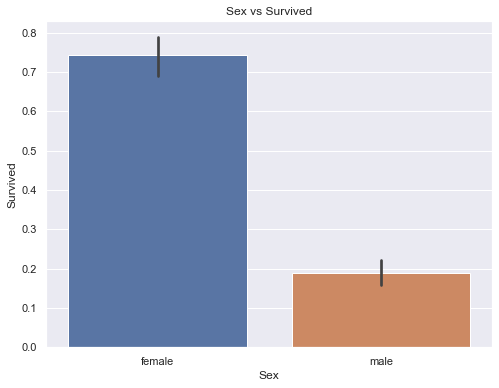

In [77]:
survived_bar('Sex')

In [78]:
survived_group('Sex')

,Survived
Sex,
male,0.188908
female,0.742038


Female has a survival rate of 74%

### Embarked feature Survival analysis

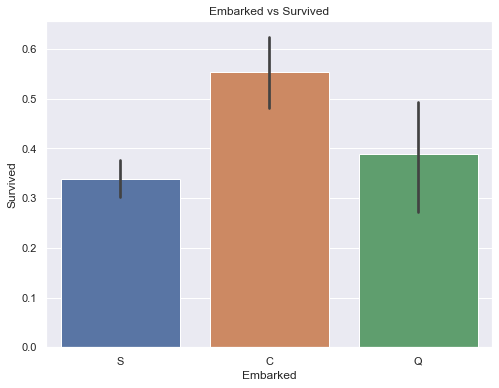

In [79]:
survived_bar('Embarked')

In [80]:
survived_group('Embarked')

,Survived
Embarked,
S,0.339009
Q,0.389610
C,0.553571


Those Embarked from Cherbourg has a higher survival rate

### Parch Survival analysis

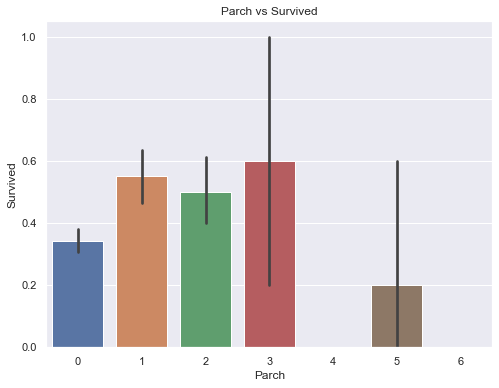

In [81]:
survived_bar('Parch')

In [82]:
survived_group('Parch')

,Survived
Parch,
4,0.000000
6,0.000000
5,0.200000
0,0.343658
2,0.500000
1,0.550847
3,0.600000


### SibSp Survival analysis

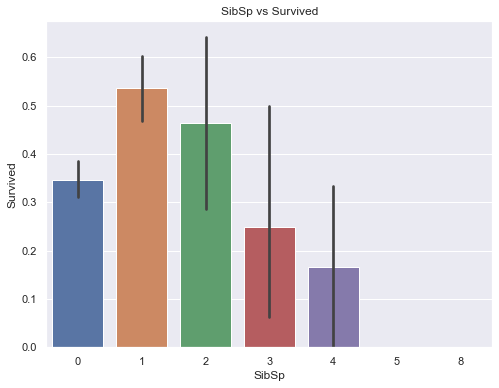

In [83]:
survived_bar('SibSp')

In [84]:
survived_group('SibSp')

,Survived
SibSp,
5,0.000000
8,0.000000
4,0.166667
3,0.250000
0,0.345395
2,0.464286
1,0.535885


### Pclass Survival

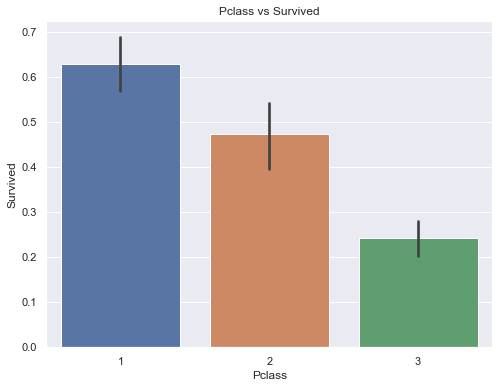

In [85]:
survived_bar('Pclass')

In [86]:
survived_group('Pclass')

,Survived
Pclass,
3,0.242363
2,0.472826
1,0.629630


First class passenger has the highest Survival rate

### Age Survival analysis

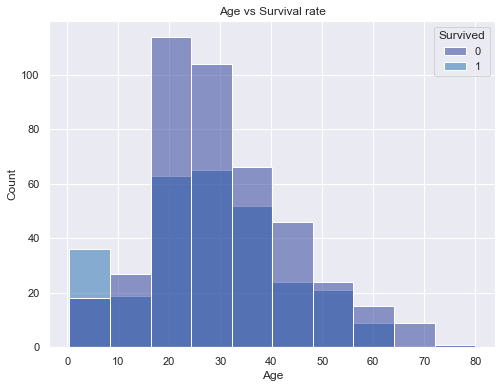

In [113]:
plt.figure(figsize=(8,6))
sns.histplot(data=titanic,x='Age',hue='Survived',bins=10).set_title('Age vs Survival rate')
sns.set_palette("YlGn")

adults from age(20 --> 30) has a high survival age

<AxesSubplot:>

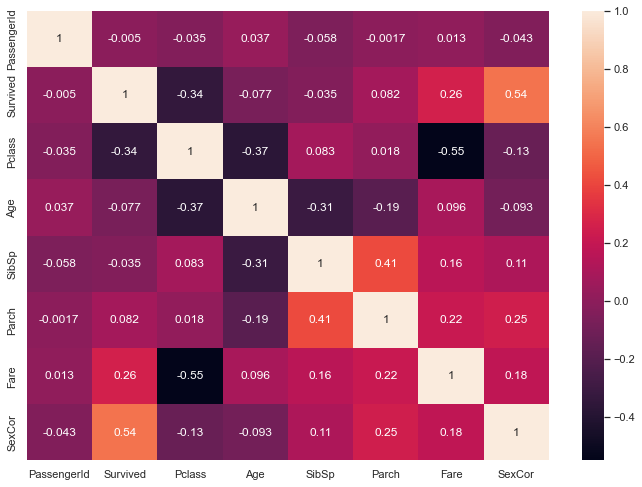

In [115]:
sns.heatmap(titanic.corr(),annot= True)

### Correlation analysis

1-Sex has strong positive correlation with Survival rate

2-Pclass has a strong negative correlation with Survival rate and a negative correlation with age 

Text(0.5, 1.0, '3-Pclass')

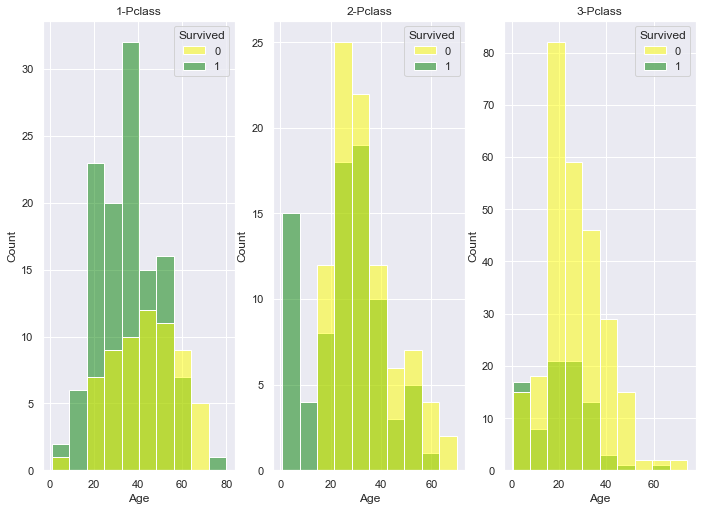

In [120]:
fig,ax=plt.subplots(1,3)
pale=['yellow','green']
sns.histplot(data=titanic.loc[titanic['Pclass']==1],x='Age',hue='Survived',bins=10,ax=ax[0],palette=sns.color_palette(pale)).set_title("1-Pclass")
sns.histplot(data=titanic.loc[titanic['Pclass']==2],x='Age',hue='Survived',bins=10,ax=ax[1],palette=sns.color_palette(pale)).set_title("2-Pclass")
sns.histplot(data=titanic.loc[titanic['Pclass']==3],x='Age',hue='Survived',bins=10,ax=ax[2],palette=sns.color_palette(pale)).set_title("3-Pclass")

Most of the passengers in Pclass 3 didn't survived

all of the childern in Pclass 2 have survived

as the result of bar plot most of the passengers in Pclass=1 survived
